# Exploratory Analysis of Structural and Functional Features in SARS-CoV-2 RBD Variant FAIR² Datasets

This notebook performs an exploratory data analysis (EDA) of structural and functional metrics associated with SARS-CoV-2 receptor-binding domain (RBD) mutations, using datasets formatted with the FAIR² Croissant schema.

We analyze multiple RecordSets capturing AlphaFold and ESMFold predictions across variant sets, including 1-step and Omicron mutations. Features include RMSD, TM-score, SASA, binding affinity, expression levels, and Bio2Byte-derived descriptors, enabling visual inspection of patterns relevant to protein stability and ACE-2 interaction.


In [ ]:
# Install mlcroissant from the source
# !sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
# !pip install mlcroissant[dev]

In [ ]:
# To install it directly from the github repository
# !pip install "git+https://github.com/${GITHUB_REPOSITORY:-mlcommons/croissant}.git@${GITHUB_HEAD_REF:-main}#subdirectory=python/mlcroissant&egg=mlcroissant[dev]"

In [1]:
import mlcroissant as mlc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from IPython.display import Markdown, display


In [ ]:
# Load the dataset from a local path
url = "https://sen.science/doi/10.71728/hw56-vj34/fair2.json"

# Load the dataset from a local path
dataset = mlc.Dataset(url)
metadata = dataset.metadata.to_json()
print(f"{metadata['name']}: {metadata['description']}")


  -  [Metadata(van_den_Boom_2025_SARS_CoV_2_Variant_Machine_Learning_Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


van_den_Boom_2025_SARS_CoV_2_Variant_Machine_Learning_Dataset: This dataset provides a comprehensive analysis of protein mutations, detailing structural and energetic metrics such as RMSD, TM-score, SASA, and binding energies. It includes sequence identifiers, mutation sites, and various quantitative measures critical for understanding protein stability, folding, and interactions, particularly with the ACE-2 receptor. The data is structured to support FAIR principles, promoting interoperability and machine actionability.


## 2. Data Overview

In the **Croissant** format, a RecordSet represents a structured collection of records, where each record is a granular dataset unit (e.g., an image, text file, or table row). It defines the structure of these records using a set of fields, such as the columns in a table or sheet, as seen in this example.

### 2.1 Review available RecordSets

In [4]:
# Format the list column as a Markdown-compatible string
def format_list_column(row):
    if isinstance(row, list):
        return "\n".join(f"- {item}" for item in row)  # Bullet point list
    return str(row)

In [5]:
# List all the record sets available in the dataset
df = pd.DataFrame(metadata["recordSet"])
columns_to_keep = {
    "@id": "Record Set ID",
    "description": "Description"
}
df = df[list(columns_to_keep.keys())]
df = df.rename(columns=columns_to_keep)

# Convert DataFrame to Markdown table
markdown_table = tabulate(df, headers="keys", tablefmt="pipe", showindex=False)

# Render the table as Markdown in Jupyter
display(Markdown(markdown_table))

| Record Set ID                                                                            | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|:-----------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA2_100_b2b_BL                | The RecordSet comprises data on protein mutations, detailing sequence identifiers, wildtype and mutated amino acids, and mutation sites. It includes structural and stability metrics such as RMSD, TM-score, SASA, and hydrophobicity. Furthermore, it evaluates energy states, aggregation propensity, and binding affinity with the ACE-2 receptor. Additional insights include expression levels, structural content, and interactions relevant to protein functionality and stability. These comprehensive metrics are critical for assessing the impact of mutations on protein structure, stability, and binding interactions, essential for ACE-2 binding and RBD expression predictions.                     |
| https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA1_100_b2b_BL                 | The RecordSet comprises detailed data on protein mutations, including unique sequence identifiers, wildtype and mutated amino acids, and mutation site positions. It features metrics such as RMSD, TM-score, SASA, binding energy, and expression levels, crucial for analyzing ACE-2 binding and RBD expression. Additional parameters include hydrophobicity, net energy, and interaction scores, offering insights into protein structure, stability, and interaction dynamics. This dataset, essential for predictive modeling and empirical validation, facilitates understanding of protein function and mutation impact on binding affinity and expression changes.                                           |
| https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA2_100_b2b_BL                 | The RecordSet comprises detailed protein mutation data critical for ACE-2 binding and RBD expression predictions. It includes fields such as Sequence Identifier, Wildtype and Mutated Amino Acids, Mutation Site, and structural metrics like RMSD, TM Score, and SASA. Additionally, it encompasses binding-related metrics such as Binding Energy and Change in Binding Energy, alongside structural stability indicators like Average Hydrophobicity and Backbone Flexibility. This dataset underpins the computational analysis and model training processes, providing a robust foundation for evaluating the impact of mutations on protein interactions and expression levels.                                |
| https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA1_100_b2b_BL                | The RecordSet contains comprehensive protein mutation data, featuring unique sequence identifiers, mutation details such as wildtype and mutated amino acids, and mutation sites. It includes structural metrics like RMSD and TM-Score, and interaction metrics such as SASA and binding affinity. Functional insights are provided through fields indicating changes in binding affinity and protein expression levels. Additional metrics include probabilities for structural formations and sidechain interactions, as well as energy computations and disorder predictions, offering a detailed profile of protein structural and functional properties for computational and empirical analysis.               |
| https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_1step_pred_wuhan_v1_b2b_03-07 | The RecordSet comprises protein mutation data, detailing sequence identifiers, wildtype and mutated residues, and mutation sites. It includes structural and interaction metrics such as RMSD, TM-Score, SASA, Average and Total Hydrophobicity, pLDDT, Local and Global Net Energy, Agmata Score, Backbone Configuration, Coil Structure Factor, Protein Disorder, Early Folding, Helix and Beta Sheet Content, Polyproline II Helix Prediction, Sidechain Interaction, Binding Affinity and its Change, Expression Levels and their Change, and the confidence scores for ACE-2 Binding and RBD Expression predictions. All fields aid in analyzing protein mutation impacts.                                       |
| https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_1step_pred_wuhan_v1_b2b_parse  | The RecordSet comprises extensive protein mutation data, detailing each mutation's sequence identifier, wildtype and mutated amino acids, and mutation sites. It includes quantitative metrics such as Root Mean Square Deviation (RMSD), TM-Score, Solvent Accessible Surface Area (SASA), and binding energy. Moreover, it provides scores for hydrophobicity, protein interaction, and post-translational modifications. Energy dynamics, expression levels, and their changes are documented, alongside confidence scores for binding and expression predictions. This dataset is critical for analyzing protein structural and functional changes, particularly in relation to ACE-2 binding and RBD expression. |

## 3. Data Extraction

#### 3.1 Load data from a specific record set into a DataFrame for analysis. 

In [6]:
record_set_ids = [record["@id"] for record in metadata["recordSet"]]

dataframes = {
    record_set_id: pd.DataFrame(list(dataset.records(record_set=record_set_id)))
    for record_set_id in record_set_ids
}

In [7]:
prefix = "https://sen.science/doi/10.71728/hw56-vj34"

for name, df in dataframes.items():
    df.rename(columns=lambda x: x.replace(prefix, "").split("/")[-1], inplace=True)

In [8]:
# Display the first rows of each dataframe
for name, df in dataframes.items():
    display(Markdown(f"#### {name}"))
    display(df.head())
    display(Markdown("---"))

#### https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA2_100_b2b_BL

,seq_id,wildtype,site,mutation,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
0,b'L3K',b'L',3,b'K',14.043675,0.404045,17379.845696,-0.256236,0.231919,157493.880497,...,0.111959,0.151154,0.265554,0.075051,0.366590,0.581097,9.28202,0.02653,9.87939,0.02585
1,b'S182M',b'S',182,b'M',19.529940,0.303545,16077.121708,-0.275586,0.242155,143035.394419,...,0.129308,0.157559,0.273846,0.072713,0.366451,0.583431,8.71450,-0.54099,9.03298,-0.82056
2,b'Q142C',b'Q',142,b'C',14.548705,0.437460,16914.715331,-0.273469,0.230573,158906.247772,...,0.104503,0.158713,0.264477,0.073441,0.370733,0.585897,7.88949,-1.36600,8.85378,-0.99977
3,b'D32P',b'D',32,b'P',13.948286,0.392586,17345.692622,-0.282993,0.231440,146893.936964,...,0.116164,0.159256,0.263554,0.075446,0.368251,0.583318,8.63048,-0.62501,8.56271,-1.29083
4,b'F158Q',b'F',158,b'Q',20.591526,0.304153,17389.449014,-0.252834,0.231106,146908.643195,...,0.137169,0.146913,0.268267,0.075723,0.363062,0.579072,9.21602,-0.03947,9.95497,0.10143


---

#### https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA1_100_b2b_BL

,seq_id,wildtype,site,mutation,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
0,b'E133E',b'E',133,b'E',7.864741,0.986435,10592.590564,-0.230612,92.279412,140377.471948,...,0.113621,0.163518,0.276262,0.073662,0.362236,0.577759,9.22224,0.00000,9.73227,0.00000
1,b'A188T',b'A',188,b'T',7.885648,0.987255,10600.992436,-0.230083,92.248872,124308.187136,...,0.114431,0.164503,0.268621,0.074472,0.366605,0.577631,9.17105,-0.05120,9.64973,-0.08255
2,b'S67N',b'S',67,b'N',8.105493,0.986569,10589.807973,-0.231141,92.213144,130351.097416,...,0.113882,0.162713,0.276523,0.073221,0.361687,0.578405,8.07826,-1.14399,8.52344,-1.20883
3,b'C156Y',b'C',156,b'Y',8.276780,0.987059,10563.109807,-0.237491,91.681437,142395.280565,...,0.111436,0.164267,0.277395,0.073318,0.364405,0.578200,6.46412,-2.75812,8.42514,-1.30713
4,b'P94H',b'P',94,b'H',8.067331,0.980544,10653.118378,-0.233258,92.289116,140728.481366,...,0.106667,0.163656,0.280021,0.072528,0.362262,0.577887,7.90481,-1.31744,8.27466,-1.45761


---

#### https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA2_100_b2b_BL

,seq_id,wildtype,site,mutation,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
0,b'G194Q',b'G',194,b'Q',6.232345,0.985194,10525.434827,-0.266818,90.550154,146995.358974,...,0.112036,0.152523,0.274067,0.073236,0.365010,0.581944,9.08543,-0.17006,9.52419,-0.32935
1,b'V192S',b'V',192,b'S',6.220321,0.986306,10486.002931,-0.261678,90.522105,141951.680198,...,0.130031,0.151518,0.268333,0.074979,0.362605,0.581328,9.08289,-0.17260,9.66455,-0.18899
2,b'A65S',b'A',65,b'S',6.322579,0.986622,10481.533509,-0.262887,92.277071,142434.930871,...,0.118569,0.153487,0.262369,0.075169,0.369236,0.581641,7.90015,-1.35534,8.42616,-1.42739
3,b'N22V',b'N',22,b'V',6.498219,0.987046,10520.946368,-0.276115,92.134933,141221.188213,...,0.103744,0.150805,0.267913,0.073210,0.373538,0.583923,8.71668,-0.53881,8.97190,-0.88165
4,b'F45Y',b'F',45,b'Y',6.326482,0.986002,10546.047667,-0.266062,92.316295,140430.862377,...,0.121677,0.156046,0.265641,0.074682,0.368621,0.582800,8.78329,-0.47220,9.02024,-0.83330


---

#### https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA1_100_b2b_BL

,seq_id,wildtype,site,mutation,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
0,b'N11R',b'N',11,b'R',18.204159,0.309430,17695.143476,-0.215797,0.227895,128553.284675,...,0.115267,0.164421,0.277795,0.073569,0.362190,0.576615,8.79806,-0.42418,8.60748,-1.12479
1,b'T138P',b'T',138,b'P',15.711428,0.463203,17153.769100,-0.228496,0.232984,127946.479638,...,0.118790,0.159456,0.273190,0.075364,0.358451,0.576436,8.63196,-0.59029,8.77817,-0.95411
2,b'P131Q',b'P',131,b'Q',18.090620,0.380762,17207.162824,-0.229554,0.233338,149829.999625,...,0.108036,0.165621,0.285190,0.071795,0.360728,0.577549,7.98971,-1.23253,8.68180,-1.05047
3,b'A40Y',b'A',40,b'Y',17.759823,0.419099,17382.571543,-0.240136,0.229205,123979.436224,...,0.103400,0.136000,0.271441,0.073123,0.368395,0.580046,9.11710,-0.10514,9.35116,-0.38111
4,b'V63P',b'V',63,b'P',18.386777,0.320389,17509.984280,-0.222676,0.227476,142266.835049,...,0.124200,0.165938,0.271236,0.076272,0.356323,0.575538,7.29271,-1.92954,8.26981,-1.46246


---

#### https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_1step_pred_wuhan_v1_b2b_03-07

,seq_id,wildtype,site,mutation,rmsd,tm_score,sasa,avg_hydro,total_hydro,plddt,...,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr,confidence_bind,confidence_expr
0,b'G72R',b'G',72,b'R',14.374260,0.389291,18593.003567,-0.261451,-0.244615,23.136774,...,0.259205,0.077831,0.369467,0.574108,6.91716,-1.85444,9.38931,-0.79657,0.074617,0.072248
1,b'D73L',b'D',73,b'L',14.326680,0.452471,16551.722910,-0.201134,-0.186154,23.600130,...,0.257615,0.077149,0.374374,0.577779,8.17004,-0.60157,9.49681,-0.68907,0.073967,0.071632
2,b'D73P',b'D',73,b'P',13.841762,0.473718,16666.825161,-0.229705,-0.213846,23.638132,...,0.246236,0.080313,0.374677,0.576041,6.67215,-2.09946,8.33725,-1.84863,0.074860,0.072617
3,b'E74H',b'E',74,b'H',14.231240,0.465446,16805.735473,-0.238171,-0.222051,23.314119,...,0.246944,0.079528,0.374856,0.576303,9.24574,0.47413,10.21024,0.02436,0.073885,0.071632
4,b'E74P',b'E',74,b'P',12.710759,0.479605,17045.420919,-0.229705,-0.213846,23.933160,...,0.243154,0.080662,0.374831,0.576210,6.30408,-2.46753,7.51580,-2.67008,0.074373,0.073356


---

#### https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_1step_pred_wuhan_v1_b2b_parse

,seq_id,wildtype,site,mutation,rmsd,tm_score,sasa,avg_hydro,total_hydro,plddt,...,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr,confidence_bind,confidence_expr
0,b'P5N',b'P',5,b'N',1.448340,0.987792,10137.006864,-0.246939,-0.233333,93.568527,...,0.255087,0.077574,0.373369,0.575846,8.85867,0.08707,10.18649,0.00061,0.072992,0.070400
1,b'V75A',b'V',75,b'A',3.876737,0.987425,10149.811638,-0.252457,-0.235897,93.854895,...,0.256923,0.079256,0.365744,0.574359,7.57076,-1.20084,8.15802,-2.02786,0.074779,0.072617
2,b'T146A',b'T',146,b'A',2.290227,0.987808,10168.643608,-0.226531,-0.210769,93.951802,...,0.258882,0.078349,0.367826,0.575277,8.68363,-0.08797,10.27108,0.08520,0.072179,0.069537
3,b'R25F',b'R',25,b'F',3.750889,0.987894,10147.318733,-0.201134,-0.186154,94.152204,...,0.252241,0.077313,0.377390,0.579092,8.59307,-0.17854,9.29968,-0.88619,0.072748,0.070153
4,b'Y141K',b'Y',141,b'K',1.822146,0.987108,10203.698736,-0.253515,-0.236923,93.795891,...,0.252867,0.079959,0.368564,0.571892,5.34607,-3.42554,9.36786,-0.81802,0.072017,0.069537


---

## 4. Exploratory Data Analysis (EDA)

To grasp the dataset’s key characteristics, identify patterns, and detect anomalies, we begin with Exploratory Data Analysis (EDA).

### 4.2 Summary statistics



### 4.2.1 Observations from Summary Statistics

The following section provides a detailed analysis of the summary statistics derived from the dataset's record sets. These observations highlight key numerical features, central tendencies, variability, and potential outliers across various metrics. By examining these statistics, we can gain insights into the structural, functional, and energetic properties of the protein mutations, as well as their implications for binding affinity and expression levels. This foundational analysis sets the stage for deeper exploration and hypothesis generation.

In [9]:
# Compute and display summary statistics for each recordset
for name, df in dataframes.items():
    display(Markdown(f"### Summary Statistics for RecordSet: {name}"))
    display(df.describe())
    display(Markdown("---"))

### Summary Statistics for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA2_100_b2b_BL

,site,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,global_net_energy,agmata,backbone,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,99.000000,99.000000,99.000000
mean,102.990000,16.373985,0.360508,17089.478863,-0.263610,0.232157,137531.085941,137531.085941,0.851513,0.872397,...,0.117534,0.152997,0.268595,0.074352,0.366134,0.581970,8.193350,-1.062139,9.103622,-0.749922
std,54.948736,2.060941,0.065779,680.762938,0.013814,0.006895,10074.052217,10074.052217,0.142311,0.003088,...,0.007448,0.004624,0.003805,0.001157,0.003047,0.002006,1.001163,1.001163,0.663241,0.663241
min,2.000000,12.640621,0.267486,15064.305979,-0.300983,0.221538,114035.641418,114035.641418,0.108185,0.866200,...,0.100595,0.130738,0.259359,0.071292,0.360297,0.578385,6.106190,-3.149300,7.766220,-2.087330
25%,59.500000,14.513526,0.304559,16717.819173,-0.271618,0.228435,130106.866321,130106.866321,0.838156,0.869509,...,0.113353,0.150268,0.265976,0.073460,0.363592,0.580488,7.263480,-1.992010,8.456555,-1.396990
50%,106.500000,16.661723,0.338816,17112.595005,-0.265571,0.231118,138661.436015,138661.436015,0.868574,0.872505,...,0.116618,0.153090,0.268190,0.074492,0.366387,0.581918,8.606430,-0.649060,9.047260,-0.806290
75%,146.250000,17.678074,0.407031,17548.110704,-0.253893,0.234251,143671.468434,143671.468434,0.887899,0.874100,...,0.120771,0.155094,0.271433,0.075285,0.367895,0.583346,9.110470,-0.145020,9.739795,-0.113750
max,194.000000,20.591526,0.508214,18535.721801,-0.238020,0.269488,160258.761937,160258.761937,1.348303,0.879097,...,0.149436,0.164728,0.277851,0.077574,0.375292,0.587169,9.362540,0.107050,10.087660,0.234110


---

### Summary Statistics for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA1_100_b2b_BL

,site,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,global_net_energy,iptm_ptm,iptm,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,101.950000,7.876065,0.982676,10628.496035,-0.228838,92.225746,139155.944129,139155.944129,0.295812,0.190278,...,0.112860,0.160848,0.276361,0.073718,0.361828,0.577448,8.265065,-0.957180,9.072851,-0.659421
std,59.287244,0.425407,0.003151,37.950703,0.013136,0.311153,7534.864601,7534.864601,0.015873,0.018641,...,0.007764,0.008816,0.004577,0.001310,0.003085,0.001962,1.100620,1.100620,0.548605,0.548605
min,1.000000,6.563545,0.978822,10540.765775,-0.259713,90.632963,121781.422515,121781.422515,0.275290,0.165039,...,0.081897,0.116379,0.265779,0.070421,0.355641,0.573528,5.300670,-3.921580,8.052400,-1.679870
25%,49.500000,7.676799,0.980392,10599.285580,-0.235639,92.156903,140024.644420,140024.644420,0.288256,0.181493,...,0.109841,0.159564,0.273381,0.072994,0.359650,0.576396,7.251252,-1.970990,8.579013,-1.153265
50%,99.000000,7.881745,0.980660,10633.185064,-0.230385,92.266281,141385.258105,141385.258105,0.292560,0.186454,...,0.113621,0.163087,0.276197,0.073662,0.362136,0.577413,8.724215,-0.498035,9.039890,-0.692380
75%,158.500000,8.046220,0.986767,10655.558601,-0.221088,92.382263,143507.315759,143507.315759,0.297439,0.192338,...,0.118368,0.165001,0.278500,0.074629,0.363582,0.578555,9.118355,-0.103887,9.581495,-0.150775
max,195.000000,8.994192,0.987893,10704.811394,-0.201512,92.889707,151082.747149,151082.747149,0.391409,0.304120,...,0.127641,0.172128,0.289297,0.076569,0.368805,0.582749,10.434310,1.212060,10.053640,0.321360


---

### Summary Statistics for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA2_100_b2b_BL

,site,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,global_net_energy,iptm_ptm,iptm,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,99.000000,99.000000,99.000000
mean,102.990000,6.220283,0.986515,10544.589585,-0.263610,92.053405,141430.777795,141430.777795,0.290134,0.183827,...,0.117534,0.152997,0.268595,0.074352,0.366134,0.581970,8.193350,-1.062139,9.103622,-0.749922
std,54.948736,0.451395,0.000967,51.060109,0.013814,0.385980,4930.844522,4930.844522,0.005445,0.006415,...,0.007448,0.004624,0.003805,0.001157,0.003047,0.002006,1.001163,1.001163,0.663241,0.663241
min,2.000000,5.126166,0.979379,10439.652538,-0.300983,90.522105,125111.737816,125111.737816,0.281195,0.172678,...,0.100595,0.130738,0.259359,0.071292,0.360297,0.578385,6.106190,-3.149300,7.766220,-2.087330
25%,59.500000,6.008709,0.986433,10506.709129,-0.271618,92.003556,141217.354978,141217.354978,0.287141,0.180223,...,0.113353,0.150268,0.265976,0.073460,0.363592,0.580488,7.263480,-1.992010,8.456555,-1.396990
50%,106.500000,6.219855,0.986662,10536.303086,-0.265571,92.128987,141987.784384,141987.784384,0.289129,0.182758,...,0.116618,0.153090,0.268190,0.074492,0.366387,0.581918,8.606430,-0.649060,9.047260,-0.806290
75%,146.250000,6.428527,0.986921,10589.534290,-0.253893,92.238743,143416.272236,143416.272236,0.291816,0.186094,...,0.120771,0.155094,0.271433,0.075285,0.367895,0.583346,9.110470,-0.145020,9.739795,-0.113750
max,194.000000,7.848300,0.987483,10683.907530,-0.238020,93.165478,148591.298558,148591.298558,0.316791,0.215537,...,0.149436,0.164728,0.277851,0.077574,0.375292,0.587169,9.362540,0.107050,10.087660,0.234110


---

### Summary Statistics for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA1_100_b2b_BL

,site,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,global_net_energy,agmata,backbone,...,disoMine,earlyFolding,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,101.950000,16.567363,0.373811,17202.337660,-0.228838,0.232778,136130.377100,136130.377100,0.655505,0.871916,...,0.112860,0.160848,0.276361,0.073718,0.361828,0.577448,8.265065,-0.957180,9.072851,-0.659421
std,59.287244,1.756158,0.062728,754.389612,0.013136,0.007525,9000.900500,9000.900500,0.121944,0.003229,...,0.007764,0.008816,0.004577,0.001310,0.003085,0.001962,1.100620,1.100620,0.548605,0.548605
min,1.000000,9.766182,0.244769,14051.366098,-0.259713,0.220766,117472.772753,117472.772753,0.110051,0.865292,...,0.081897,0.116379,0.265779,0.070421,0.355641,0.573528,5.300670,-3.921580,8.052400,-1.679870
25%,49.500000,15.389465,0.321874,16717.163597,-0.235639,0.228118,128615.718362,128615.718362,0.621385,0.869737,...,0.109841,0.159564,0.273381,0.072994,0.359650,0.576396,7.251252,-1.970990,8.579013,-1.153265
50%,99.000000,16.543704,0.381180,17221.177245,-0.230385,0.231900,135505.467411,135505.467411,0.637682,0.872200,...,0.113621,0.163087,0.276197,0.073662,0.362136,0.577413,8.724215,-0.498035,9.039890,-0.692380
75%,158.500000,17.877431,0.420713,17599.119579,-0.221088,0.234286,142284.979469,142284.979469,0.669005,0.873967,...,0.118368,0.165001,0.278500,0.074629,0.363582,0.578555,9.118355,-0.103887,9.581495,-0.150775
max,195.000000,20.109900,0.561523,19220.562804,-0.201512,0.268406,159538.869732,159538.869732,1.163554,0.880400,...,0.127641,0.172128,0.289297,0.076569,0.368805,0.582749,10.434310,1.212060,10.053640,0.321360


---

### Summary Statistics for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_1step_pred_wuhan_v1_b2b_03-07

,site,rmsd,tm_score,sasa,avg_hydro,total_hydro,plddt,local_net_energy,global_net_energy,agmata,...,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr,confidence_bind,confidence_expr
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,...,3705.000000,3705.000000,3705.000000,3705.000000,3667.000000,3667.000000,3599.000000,3599.000000,3705.000000,3705.000000
mean,98.000000,13.067328,0.511171,17389.116228,-0.241085,-0.225084,23.431515,138183.297545,138183.297545,0.705843,...,0.251243,0.078945,0.373397,0.575292,7.758062,-1.016430,9.247051,-0.938834,-0.124588,-0.124454
std,56.298509,2.751691,0.087152,860.409872,0.021941,0.021818,0.699396,10260.640794,10260.640794,0.128986,...,0.004707,0.001280,0.003351,0.002082,1.164009,1.163159,1.034650,1.034652,0.511565,0.511730
min,1.000000,2.034227,0.267615,12462.077622,-0.292914,-0.325000,21.787055,113340.518294,113340.518294,0.077744,...,0.238631,0.075508,0.365708,0.569446,5.000000,-3.848170,6.358430,-3.826300,-2.509504,-2.227478
25%,49.000000,11.816996,0.460910,16862.256763,-0.256160,-0.239487,22.980532,129716.658063,129716.658063,0.691841,...,0.247892,0.077949,0.370769,0.573836,6.906460,-1.869440,8.430575,-1.754730,0.071936,0.069414
50%,98.000000,13.068813,0.503596,17354.200913,-0.240967,-0.225128,23.441710,138557.784058,138557.784058,0.701221,...,0.251103,0.078949,0.373436,0.575149,8.351140,-0.421670,9.660460,-0.526380,0.072585,0.070030
75%,147.000000,14.639110,0.549032,17994.606478,-0.225472,-0.209231,23.781169,144656.562236,144656.562236,0.724338,...,0.254415,0.079862,0.375667,0.576697,8.620925,-0.152640,10.107605,-0.078270,0.073723,0.071385
max,195.000000,20.947901,0.961636,20292.638790,-0.192139,-0.177436,41.470246,164568.211490,164568.211490,1.710938,...,0.263923,0.082431,0.381744,0.581251,10.596560,1.863240,10.618950,0.433080,0.078435,0.075697


---

### Summary Statistics for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_1step_pred_wuhan_v1_b2b_parse

,site,rmsd,tm_score,sasa,avg_hydro,total_hydro,plddt,local_net_energy,global_net_energy,iptm_ptm,...,helix,ppII,sheet,sidechain,bind,delta_bind,expr,delta_expr,confidence_bind,confidence_expr
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,...,3705.000000,3705.000000,3705.000000,3705.000000,3667.000000,3667.000000,3599.000000,3599.000000,3705.000000,3705.000000
mean,98.000000,3.167766,0.987726,10183.579781,-0.241113,-0.225028,93.873832,136764.097713,136764.097713,0.334533,...,0.251243,0.078945,0.373397,0.575292,7.758062,-1.016430,9.247051,-0.938834,-0.124588,-0.124454
std,56.298509,1.170343,0.000663,39.805764,0.021922,0.021663,0.414657,9695.190055,9695.190055,0.100971,...,0.004707,0.001280,0.003351,0.002082,1.164009,1.163159,1.034650,1.034652,0.511565,0.511730
min,1.000000,0.831394,0.981840,10042.305659,-0.287377,-0.269744,90.610067,124509.312592,124509.312592,0.272472,...,0.238631,0.075508,0.365708,0.569446,5.000000,-3.848170,6.358430,-3.826300,-2.509504,-2.227478
25%,49.000000,2.265275,0.987603,10160.004946,-0.256160,-0.239487,93.811624,129701.582650,129701.582650,0.289817,...,0.247892,0.077949,0.370769,0.573836,6.906460,-1.869440,8.430575,-1.754730,0.071936,0.069414
50%,98.000000,3.027272,0.987765,10180.973660,-0.241119,-0.225128,93.954028,131008.536135,131008.536135,0.298095,...,0.251103,0.078949,0.373436,0.575149,8.351140,-0.421670,9.660460,-0.526380,0.072585,0.070030
75%,147.000000,3.959238,0.987869,10203.953305,-0.225472,-0.209231,94.066898,149831.156866,149831.156866,0.315612,...,0.254415,0.079862,0.375667,0.576697,8.620925,-0.152640,10.107605,-0.078270,0.073723,0.071385
max,195.000000,6.756311,0.999680,10425.917937,-0.192139,-0.177436,95.200147,153385.334377,153385.334377,0.829568,...,0.263923,0.082431,0.381744,0.581251,10.596560,1.863240,10.618950,0.433080,0.078435,0.075697


---

### 4.2.1 Observations from Summary Statistics

The summary statistics provide an overview of the key numerical features across the record sets. Below are the key observations:

1. **Central Tendency and Spread**:
    - Metrics such as `rmsd`, `tm_score`, and `sasa` exhibit varying ranges and means, reflecting differences in structural stability and solvent accessibility across mutations.
    - Binding-related metrics like `binding_energy` and `delta_bind` show variability, indicating the diverse impact of mutations on binding affinity.

2. **Hydrophobicity and Energy Metrics**:
    - `avg_hydro` and `total_hydro` provide insights into the hydrophobicity of the proteins, which is crucial for understanding folding and stability.
    - Energy metrics such as `local_net_energy` and `global_net_energy` highlight the energetic states of the proteins, with some mutations leading to significant changes.

3. **Structural and Functional Insights**:
    - Structural metrics like `plddt`, `average_interface_pae`, and `average_interface_plddt` indicate the confidence in structural predictions and interface stability.
    - Functional metrics such as `expr` and `delta_expr` reveal the expression levels and their changes, which are critical for understanding the functional impact of mutations.

4. **Outliers and Missing Data**:
    - Some fields, such as `bind`, `delta_bind`, and `expr`, have missing values, which may require further investigation or imputation.
    - Outliers in metrics like `binding_energy` and `confidence_bind` could indicate mutations with extreme effects, warranting closer examination.

These observations provide a foundation for deeper analysis, enabling the identification of patterns, anomalies, and relationships between mutations and their structural or functional consequences.

### 4.2.2 Distribution Analysis of Feature Values

This subsection focuses on analyzing the distribution of feature values across the dataset. By visualizing the distributions, we aim to identify patterns, variability, and potential outliers in the data. This analysis provides insights into the range and frequency of feature values, helping to understand the underlying characteristics of the dataset and guiding further exploratory and modeling efforts.

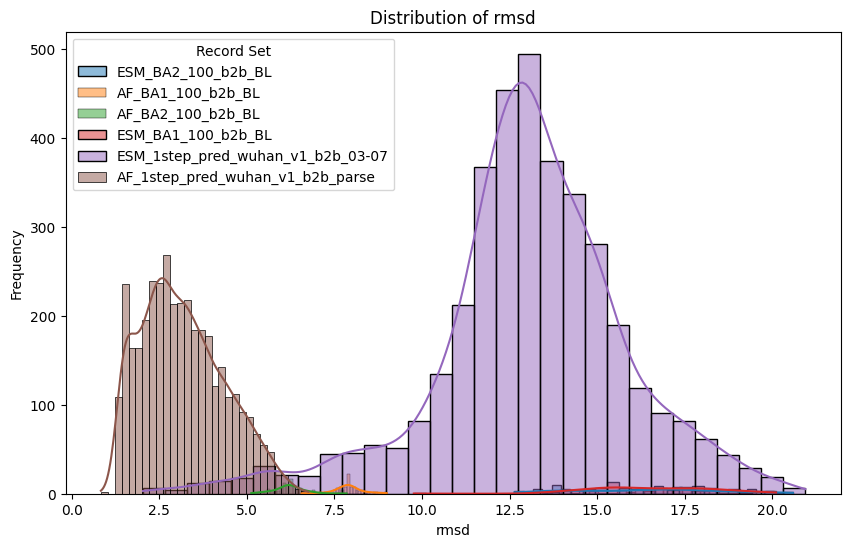

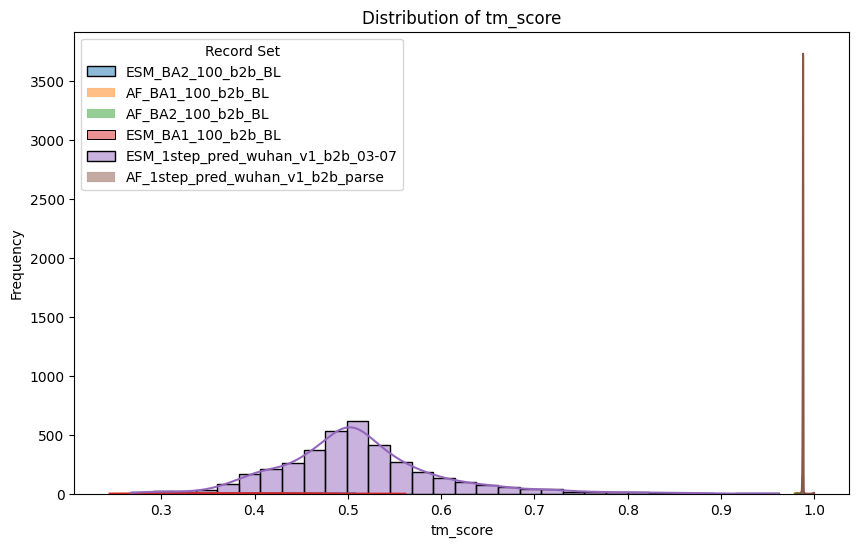

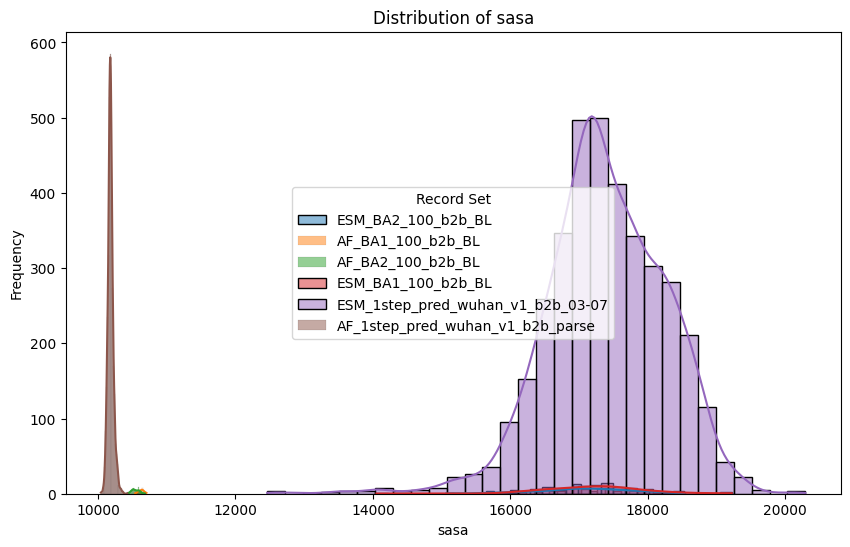

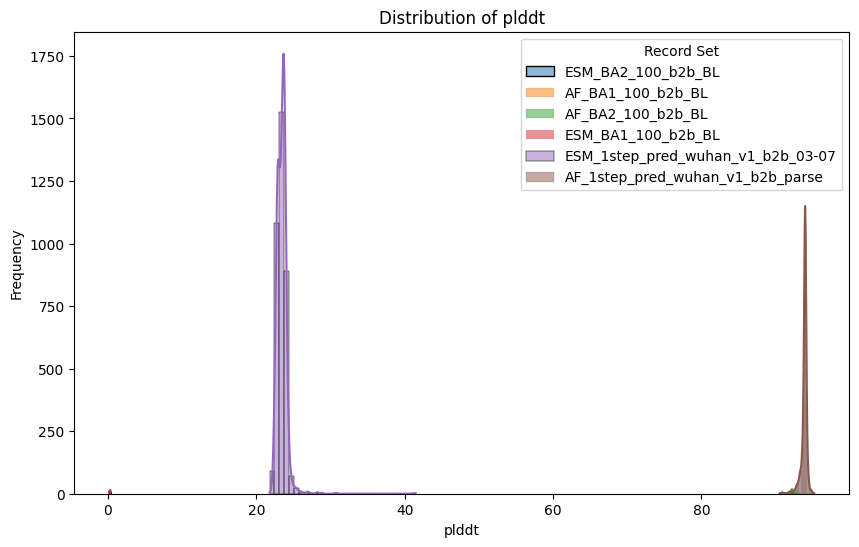

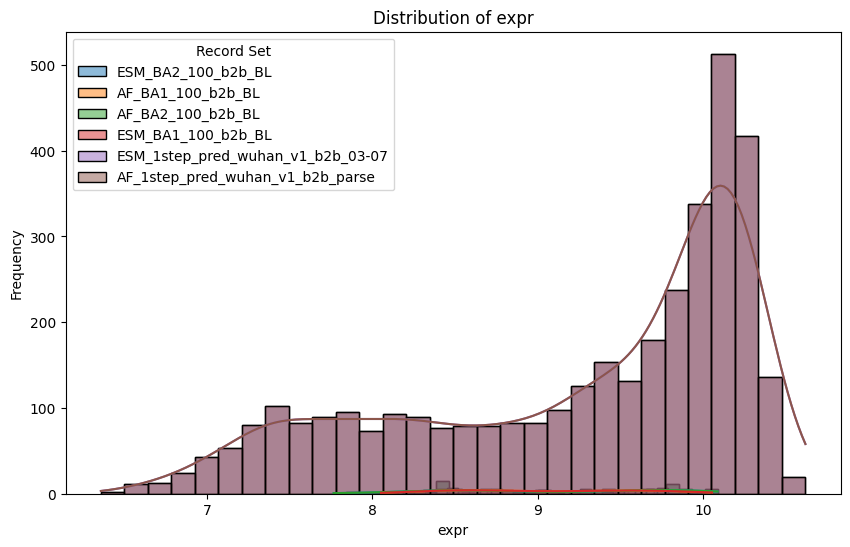

In [10]:
# Select features to visualize
features_to_plot = ['rmsd', 'tm_score', 'sasa', 'plddt', 'expr']

# Plot histograms for each feature across all record sets
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    for name, df in dataframes.items():
        label = name.split("/")[-1]  # Use only the last part after the "/"
        sns.histplot(df[feature].dropna(), kde=True, label=label, bins=30, alpha=0.5)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend(title="Record Set")
    plt.show()

### 4.2.2 Observations from Distribution Analysis

The distribution analysis reveals key patterns across the selected features. Metrics such as `rmsd` and `tm_score` exhibit relatively narrow distributions, indicating consistent structural stability across mutations. In contrast, `sasa` shows a broader range, reflecting variability in solvent accessibility. The `plddt` feature demonstrates high confidence in structural predictions, with most values concentrated near the upper range. The `expr` feature, representing expression levels, displays a bimodal distribution, suggesting distinct groups of mutations with varying impacts on protein expression. These insights highlight the diversity in structural and functional effects of the analyzed mutations.

## 4.3 Correlation Analysis

This subsection focuses on analyzing the relationships between various features within the dataset using correlation matrices. By visualizing the correlations, we aim to identify patterns, dependencies, and potential redundancies among the features. This analysis provides insights into how different metrics interact, which can guide feature selection and model development for downstream tasks.

### Correlation Heatmap for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA2_100_b2b_BL

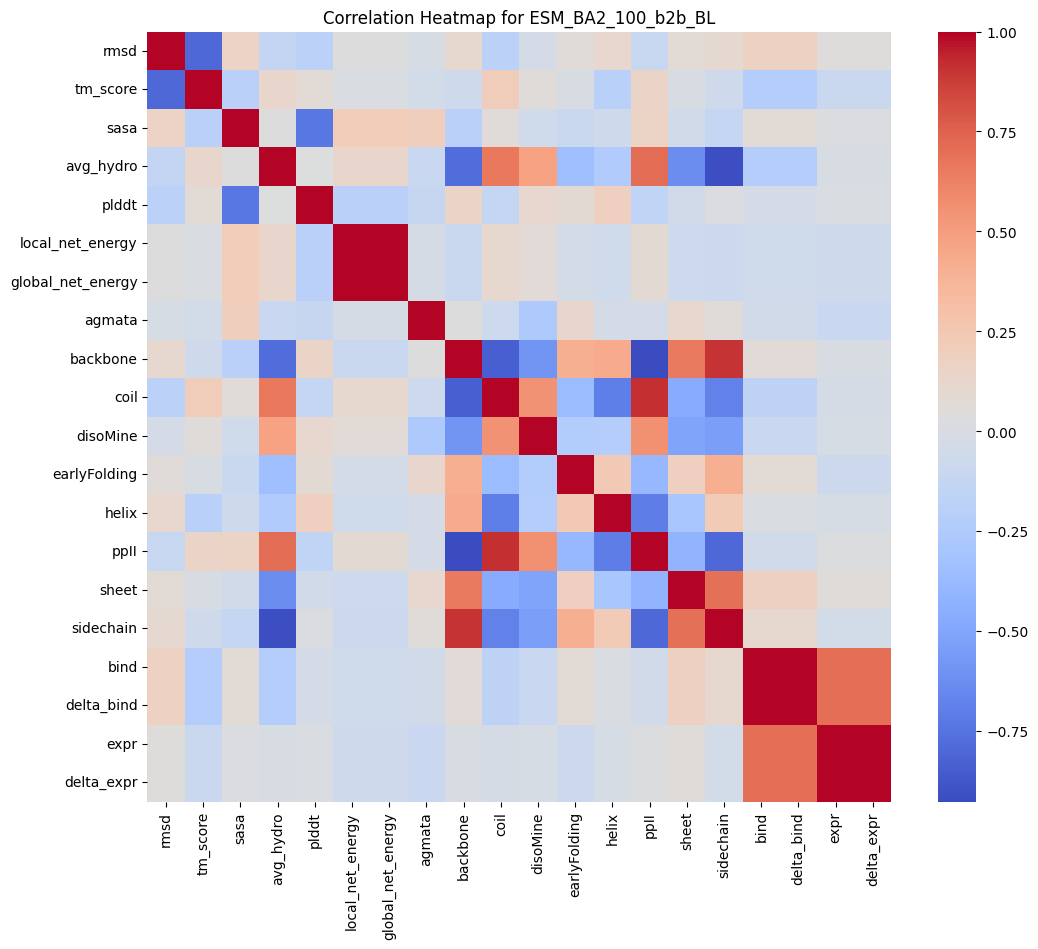

### Correlation Heatmap for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA1_100_b2b_BL

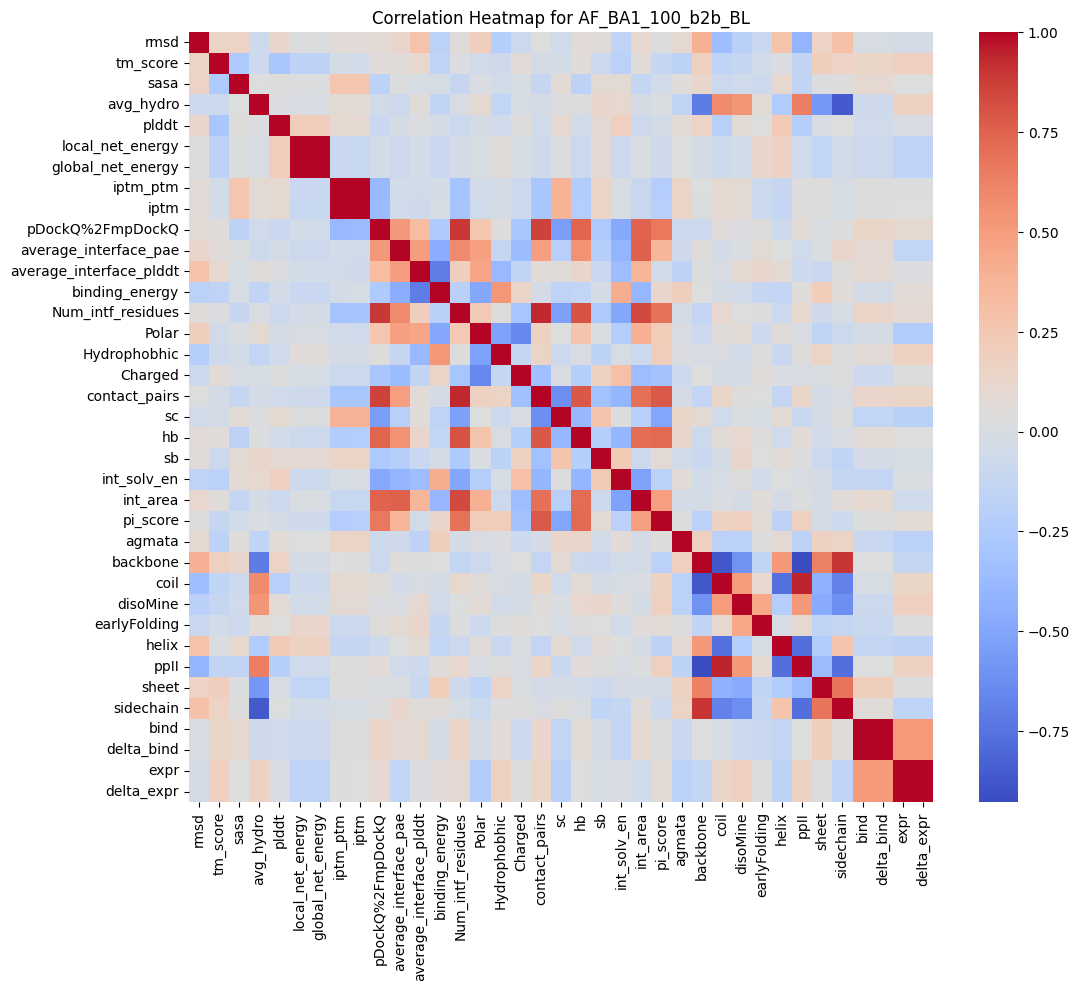

### Correlation Heatmap for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA2_100_b2b_BL

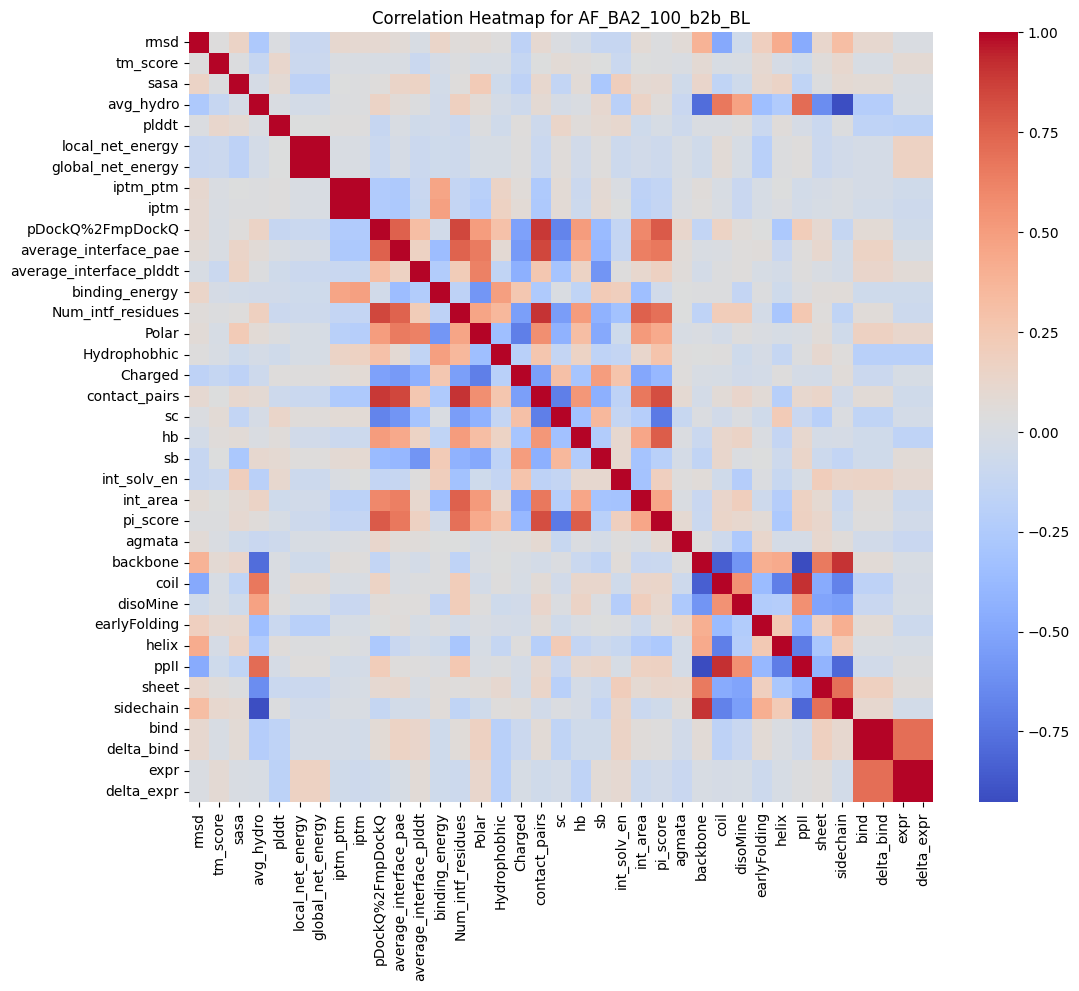

### Correlation Heatmap for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA1_100_b2b_BL

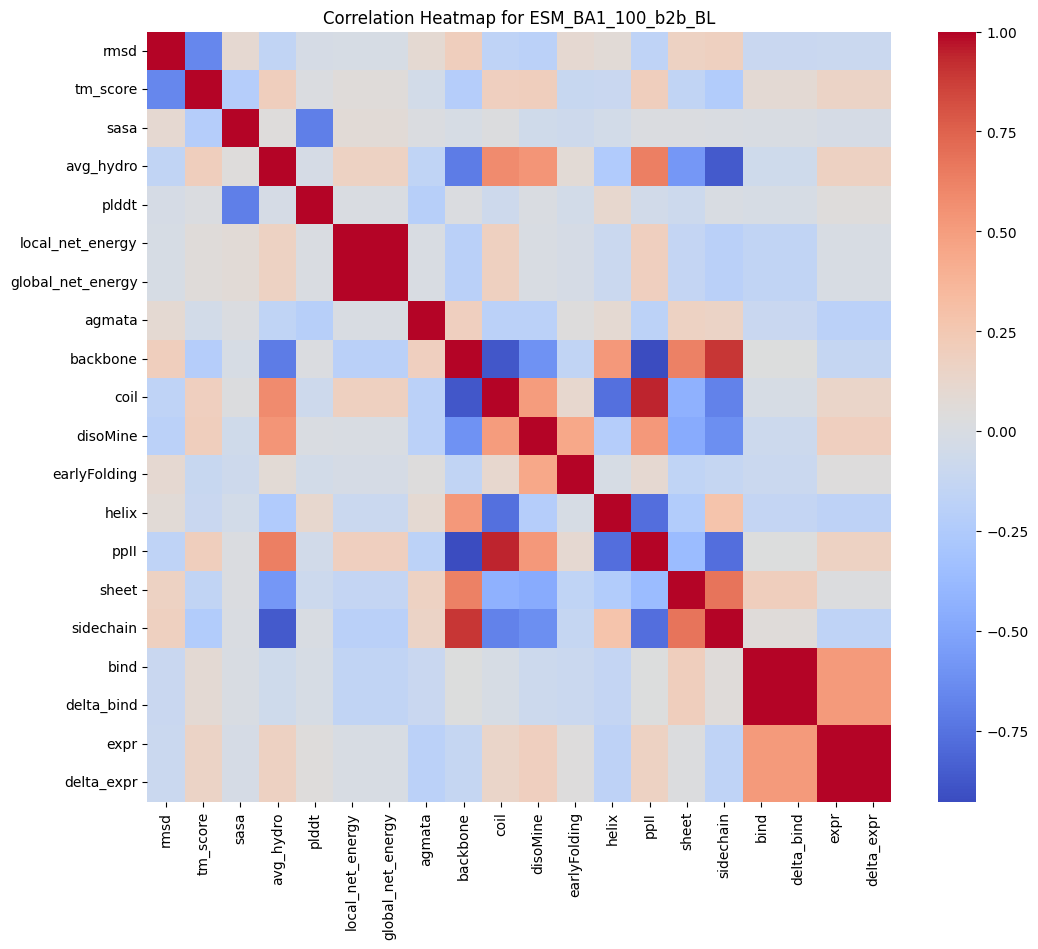

### Correlation Heatmap for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_1step_pred_wuhan_v1_b2b_03-07

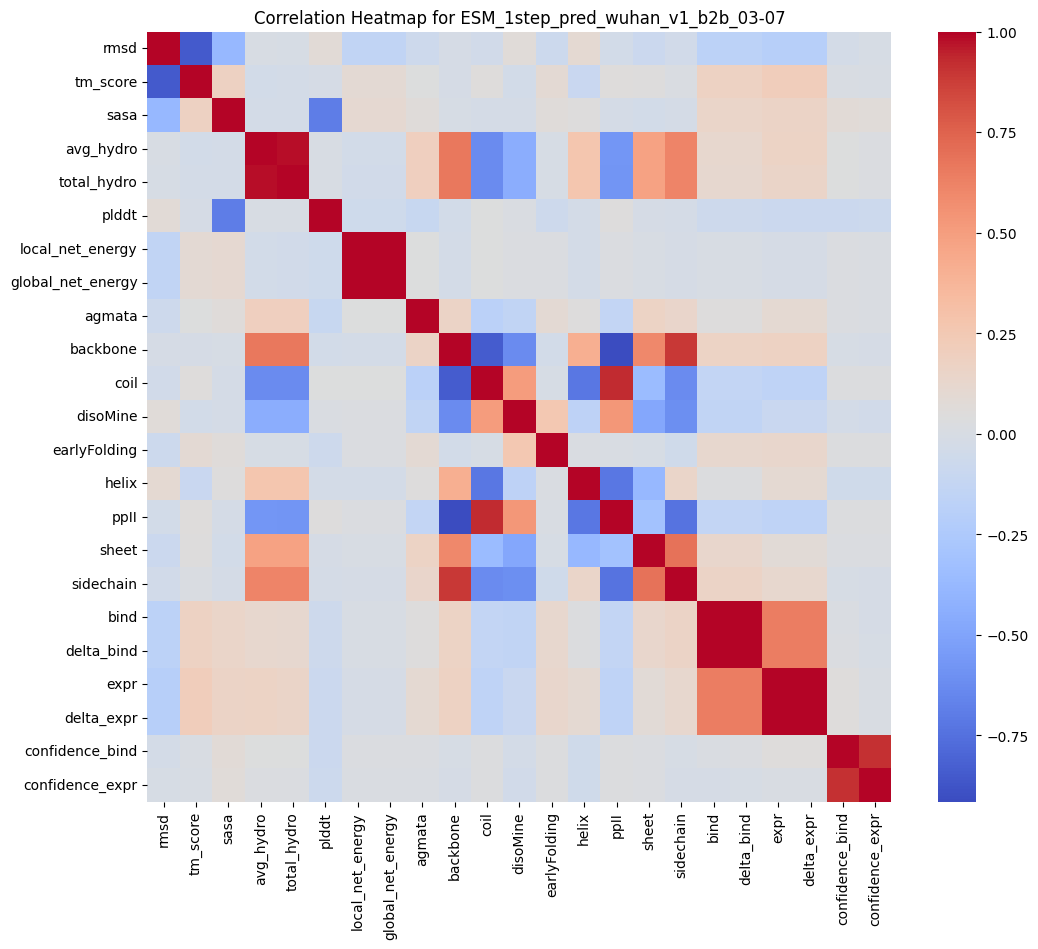

### Correlation Heatmap for RecordSet: https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_1step_pred_wuhan_v1_b2b_parse

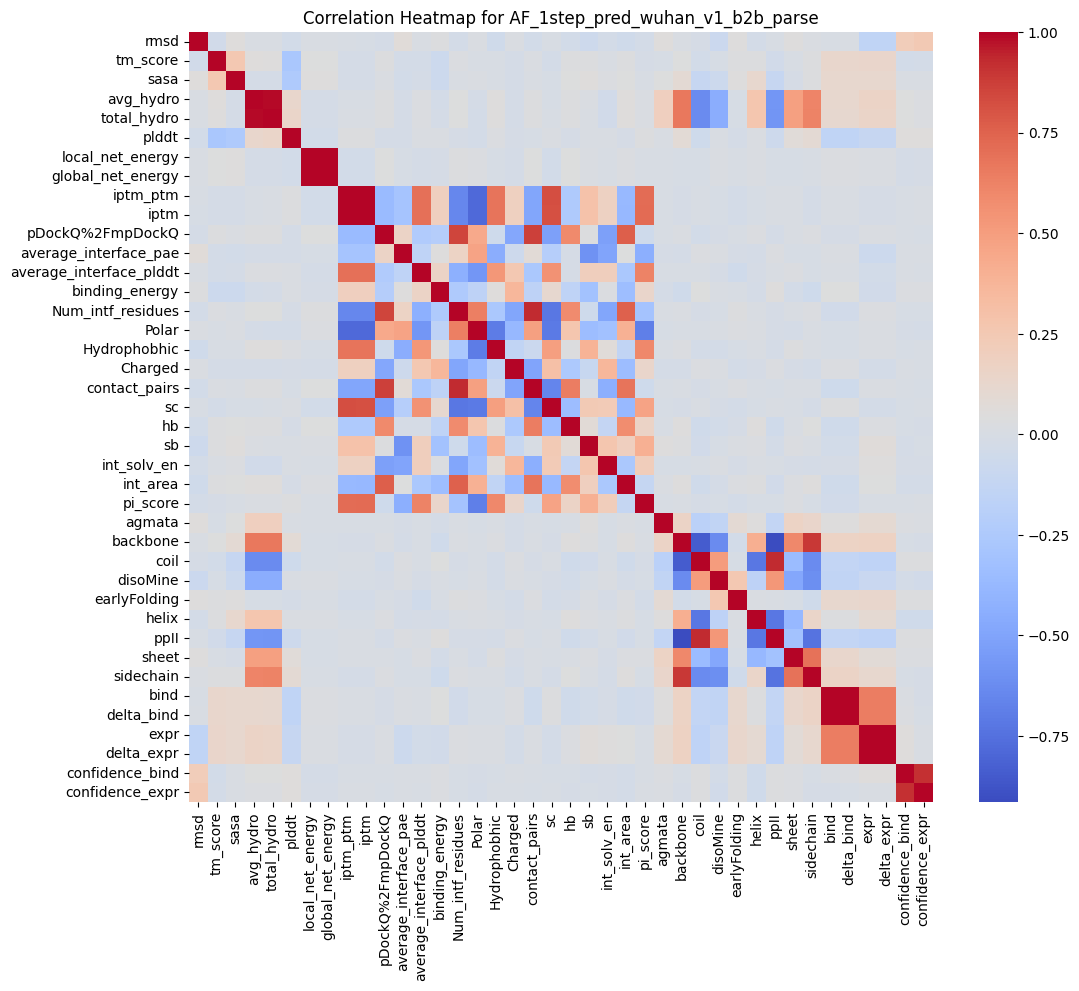

In [11]:
# Compute and display correlations for each dataset using columns after 'rmsd'
for name, df in dataframes.items():
    display(Markdown(f"### Correlation Heatmap for RecordSet: {name}"))
    correlation_matrix = df.loc[:, 'rmsd':].corr()  # Select columns starting from 'rmsd'
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap for {name.split('/')[-1]}")
    plt.show()

### Observations from Correlation Analysis

The correlation heatmaps reveal several notable patterns across the dataset:

1. **Strong Positive Correlations**:
    - Features such as `iptm` and `iptm_ptm` exhibit near-perfect positive correlations, indicating redundancy or shared underlying factors.
    - Structural metrics like `backbone` and `helix` show strong positive correlations, reflecting their interdependence in protein stability.

2. **Negative Correlations**:
    - Features like `coil` and `backbone` display strong negative correlations, consistent with their opposing roles in protein structure.
    - `rmsd` shows weak negative correlations with metrics like `tm_score` and `plddt`, suggesting that higher structural stability corresponds to lower deviations.

3. **Weak or No Correlations**:
    - Metrics such as `binding_energy` and `confidence_bind` exhibit weak correlations with most other features, indicating their independence in capturing specific aspects of protein interactions.

4. **Clusters of Related Features**:
    - Hydrophobicity-related metrics (`avg_hydro`, `total_hydro`) form a distinct cluster, highlighting their shared influence on protein folding and stability.
    - Interaction metrics like `contact_pairs`, `hb`, and `sb` are moderately correlated, reflecting their collective role in protein-protein interactions.

These insights provide a foundation for feature selection and dimensionality reduction, aiding in downstream modeling and analysis.

### 4.4 Visualization of PDB Files

This section focuses on visualizing the structural data in PDB (Protein Data Bank) format. By rendering the 3D structures of proteins, we can gain insights into the spatial arrangement of atoms, secondary structure elements, and the effects of mutations on protein conformation. The visualization will leverage tools such as `nglview` for interactive 3D rendering.

In [12]:
# Install dependencies if needed
!pip install py3Dmol ipywidgets

In [12]:
# Load Croissant dataset and map to local file paths
from pathlib import Path
import json

import os

# Get the distribution metadata directly
variant_map = {}

for dist in dataset.metadata.distribution:
    if dist.name and dist.name.endswith('.pdb') and dist.content_url:
        parts = dist.id.split("/")[-2:]  # e.g., ["1step_AF", "T146A"]
        label = f"{parts[0]}/{parts[1]}"
        variant_map[label] = dist.content_url

print(f"Mapped {len(variant_map)} variants to remote URLs.")

Mapped 7810 variants to remote URLs.


In [66]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import py3Dmol
import requests
import re
import pandas as pd

# --- Step 1: Build mutation_map with full variant labels like "1step_AF/A103C" ---
subset_to_df_key = {
    "1step_AF": "https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_1step_pred_wuhan_v1_b2b_parse",
    "BA1_AF": "https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA1_100_b2b_BL",
    "BA2_AF": "https://sen.science/doi/10.71728/hw56-vj34/record-sets/AF_BA2_100_b2b_BL",
    "1step_ESM": "https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_1step_pred_wuhan_v1_b2b_03-07",
    "BA1_ESM": "https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA1_100_b2b_BL",
    "BA2_ESM": "https://sen.science/doi/10.71728/hw56-vj34/record-sets/ESM_BA2_100_b2b_BL"
}

mutation_map = {}

for label in variant_map.keys():  # e.g. "1step_AF/P5N"
    try:
        subset, seq_id = label.split("/")
        df_key = subset_to_df_key.get(subset)
        df = dataframes.get(df_key)

        if df is not None:
            # Decode all seq_ids in the dataframe if needed
            df["decoded_seq_id"] = df["seq_id"].apply(lambda x: x.decode() if isinstance(x, bytes) else x)
            match = df[df["decoded_seq_id"] == seq_id]

            if not match.empty and "site" in match.columns:
                site = match["site"].values[0]
                mutation_map[label] = int(site)
    except Exception as e:
        print(f"⚠️ Error processing {label}: {e}")

# --- Step 2: Setup UI ---
sorted_variants = sorted(variant_map.keys())
default_variant = sorted_variants[0]

search_box = widgets.Text(
    placeholder="Type to filter variants...",
    description="Search:",
    layout=widgets.Layout(width='50%')
)

variant_dropdown = widgets.Dropdown(
    options=sorted_variants,
    value=default_variant,
    description='Variant:',
    layout=widgets.Layout(width='50%')
)

style_dropdown = widgets.Dropdown(
    options=['cartoon', 'sticks', 'surface', 'spheres', 'lines'],
    value='cartoon',
    description='Style:',
    layout=widgets.Layout(width='30%')
)

output = widgets.Output()
viewer = py3Dmol.view(width=700, height=450)

# --- Step 3: Filter dropdown based on search box ---
def filter_dropdown(change):
    term = change['new'].lower()
    matches = [v for v in sorted_variants if term in v.lower()]
    if matches:
        variant_dropdown.options = matches
        variant_dropdown.value = matches[0]
    else:
        variant_dropdown.options = ["No matches"]
        variant_dropdown.value = "No matches"

search_box.observe(filter_dropdown, names='value')

# --- Step 4: Show structure with highlighting ---
def show_structure(change=None):
    output.clear_output(wait=True)
    label = variant_dropdown.value
    style = style_dropdown.value

    if label not in variant_map:
        with output:
            print(f"Variant '{label}' not found.")
        return

    url = variant_map[label]

    try:
        response = requests.get(url)
        response.raise_for_status()
        pdb_str = response.text

        with output:
            viewer.removeAllModels()
            viewer.addModel(pdb_str, 'pdb')

            # Apply main rendering style
            if style == 'cartoon':
                viewer.setStyle({'cartoon': {'color': 'spectrum'}})
            elif style == 'sticks':
                viewer.setStyle({'stick': {}})
            elif style == 'spheres':
                viewer.setStyle({'sphere': {}})
            elif style == 'lines':
                viewer.setStyle({'line': {}})
            elif style == 'surface':
                viewer.setStyle({'surface': {'opacity': 0.85}})
            else:
                viewer.setStyle({'cartoon': {'color': 'spectrum'}})

            # --- Mutation Highlighting using 'site' ---
            seq_id = label
            mut_pos = mutation_map.get(seq_id)

            # Parse first residue number from ATOM line
            first_resi = None
            for line in pdb_str.splitlines():
                if line.startswith("ATOM"):
                    try:
                        first_resi = int(line[22:26].strip())
                        break
                    except ValueError:
                        continue

            offset = (first_resi - 1) if first_resi is not None else 0
            if not mut_pos:
                with output:
                    print(f"Mutation position not found for {seq_id}.")
                return
            aligned_pos = mut_pos + offset
            viewer.setStyle({'resi': str(aligned_pos)}, {'stick': {'color': 'red'}})

            viewer.zoomTo()
            viewer.render()
            display(viewer)

    except Exception as e:
        with output:
            print(f"Error loading structure from {url}: {e}")

# --- Step 5: Bind events and display UI ---
variant_dropdown.observe(show_structure, names='value')
style_dropdown.observe(show_structure, names='value')

display(widgets.VBox([
    search_box,
    widgets.HBox([variant_dropdown, style_dropdown]),
    output
]))

show_structure()  # Initial render

# Observations

This notebook provides a comprehensive exploratory analysis of structural and functional features associated with SARS-CoV-2 RBD mutations. Key observations include:

1. **Dataset Overview**:
    - The dataset comprises multiple RecordSets, each capturing detailed metrics on protein mutations, including structural stability, binding affinity, and expression levels.
    - Metadata and RecordSet descriptions highlight the dataset's focus on ACE-2 binding and RBD expression predictions.

2. **Data Exploration**:
    - Summary statistics reveal variability in structural and functional metrics, such as RMSD, TM-score, SASA, and binding energy, across mutations.
    - Distribution analysis identifies patterns and outliers, providing insights into the diversity of mutation impacts.

3. **Correlation Analysis**:
    - Correlation heatmaps uncover relationships between features, such as strong positive correlations among structural metrics and weak correlations for binding-related metrics.

4. **Visualization**:
    - Histograms and heatmaps effectively illustrate feature distributions and interdependencies, aiding in pattern recognition and hypothesis generation.

5. **Insights**:
    - Structural metrics like `plddt` and `tm_score` indicate high confidence in predictions, while functional metrics such as `expr` and `delta_expr` highlight the impact of mutations on protein expression.
    - Observations of outliers and missing data suggest areas for further investigation or preprocessing.

These analyses provide a foundation for understanding the structural and functional consequences of SARS-CoV-2 RBD mutations, supporting downstream modeling and research efforts. The notebook demonstrates the utility of FAIR² datasets in enabling reproducible and actionable insights into protein mutation impacts.

# Conclusions
In this notebook, we conducted a comprehensive exploratory analysis of structural and functional features associated with SARS-CoV-2 RBD mutations. By leveraging FAIR² datasets, we examined key metrics such as RMSD, TM-score, SASA, binding energy, and expression levels across multiple RecordSets. Through summary statistics, distribution visualizations, and correlation analyses, we identified patterns, variability, and relationships among features, providing insights into the structural stability, binding affinity, and functional impacts of mutations. These findings contribute to a deeper understanding of protein mutation effects, supporting future research and predictive modeling efforts.